<a href="https://colab.research.google.com/github/plaban1981/Huggingface_transformers_course/blob/main/huggingface_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Huggingface

https://huggingface.co/course/chapter1/3?fw=pt

The natural language processing (NLP) using libraries from the Hugging Face ecosystem 
* 🤗 Transformers, 
* 🤗 Datasets, 
* 🤗 Tokenizers, and 
* 🤗 Accelerate — as well as the Hugging Face Hub.

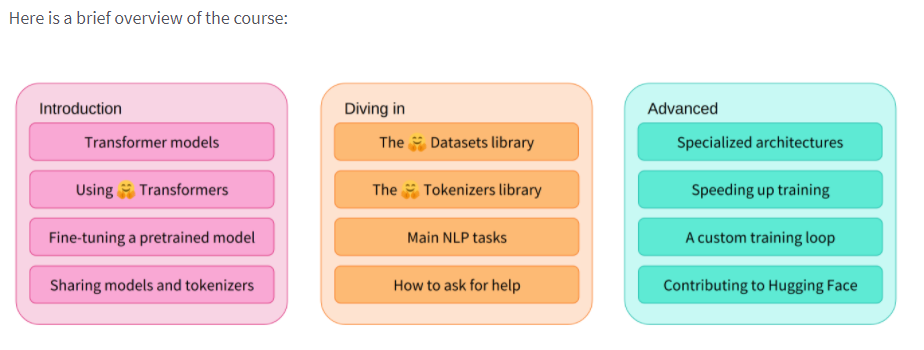

## Natural Language Processing

NLP is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.

The following is a list of common NLP tasks, with some examples of each:

* **Classifying whole sentences:** Getting the sentiment of a review, detecting if an email is spam, determining if a sentence is grammatically correct or whether two sentences are logically related or not 

* **Classifying each word in a sentence:** Identifying the grammatical components of a sentence (noun, verb, adjective), or the named entities (person, location, organization)

* **Generating text content:** Completing a prompt with auto-generated text, filling in the blanks in a text with masked words

* **Extracting an answer from a text:** Given a question and a context, extracting the answer to the question based on the information provided in the context

* **Generating a new sentence from an input text:** Translating a text into another language, summarizing a text

## Why is it challenging?

Computers don’t process information in the same way as humans.For machine learning (ML) models, such tasks are more difficult. The text needs to be processed in a way that enables the model to learn from it. And because language is complex, we need to think carefully about how this processing must be done.

## Transformers, what can they do?
Transformer models are used to solve all kinds of NLP tasks, like the ones mentioned in the previous section.

The most basic object in the 🤗 Transformers library is the **pipeline**. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer

In [1]:
! pip install datasets transformers

     |████████████████████████████████| 245kB 4.2MB/s 
     |████████████████████████████████| 2.3MB 6.3MB/s 
     |████████████████████████████████| 245kB 24.3MB/s 
     |████████████████████████████████| 122kB 31.1MB/s 
     |████████████████████████████████| 3.3MB 29.5MB/s 
     |████████████████████████████████| 901kB 26.5MB/s 
ERROR: transformers 4.6.1 has requirement huggingface-hub==0.0.8, but you'll have huggingface-hub 0.0.10 which is incompatible.


In [2]:
import transformers
from transformers import pipeline
#
classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

* By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. 

* The model is downloaded and cached when you create the classifier object. 

* If you rerun the command, the cached model will be used instead and there is no need to download the model again.

## Passing several sentences

In [3]:
sentence_list = ["I've been waiting for a HuggingFace course my whole life.", 
"I hate this so much!",
 "I enjoy eating ice-cream",
 "I am not in a mood to talk"
]

In [4]:
classifier(sentence_list)

[{'label': 'POSITIVE', 'score': 0.9598047733306885},
 {'label': 'NEGATIVE', 'score': 0.9994558095932007},
 {'label': 'POSITIVE', 'score': 0.999464213848114},
 {'label': 'NEGATIVE', 'score': 0.9996479153633118}]

* Here the classifier that was cached was used for classification.

There are three main steps involved when you pass some text to a pipeline:

* The text is preprocessed into a format the model can understand.

* The preprocessed inputs are passed to the model.

* The predictions of the model are post-processed, so you can make sense of them.

## Currently available pipelines

* feature-extraction (get the vector representation of a text)
* fill-mask
ner (named entity recognition)
* question-answering
* sentiment-analysis
* summarization
* text-generation
* translation
* zero-shot-classification

## feature-extraction 

In [6]:
classifier = pipeline("feature-extraction")
doc_matrix = classifier("I've been waiting for a HuggingFace course my whole life.")

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
type(doc_matrix),len(doc_matrix)

(list, 1)

In [15]:
import numpy as np
np.array(doc_matrix).shape

(1, 18, 768)

## Zero-shot classification

* It is used to classify texts that haven’t been labelled.
* This pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model

In [23]:
classifier = pipeline('zero-shot-classification')
classifier(
    ["Mr Modi is the prime minister of India",
     "Rhihana's next album is a massive hit",
     "Vitamin C is very much esstential to boost immunity",
     "I am applying for a post graduate program in AI"],
    candidate_labels=["education", "politics", "business","entertainment","medicine"],
)

[{'labels': ['politics', 'entertainment', 'education', 'business', 'medicine'],
  'scores': [0.8936405777931213,
   0.0492694154381752,
   0.02371794730424881,
   0.019631482660770416,
   0.01374071091413498],
  'sequence': 'Mr Modi is the prime minister of India'},
 {'labels': ['entertainment', 'business', 'education', 'medicine', 'politics'],
  'scores': [0.8401675820350647,
   0.11878533661365509,
   0.014939829707145691,
   0.014485985971987247,
   0.011621265672147274],
  'sequence': "Rhihana's next album is a massive hit"},
 {'labels': ['medicine', 'business', 'entertainment', 'education', 'politics'],
  'scores': [0.8594235777854919,
   0.08075584471225739,
   0.029811637476086617,
   0.017714107409119606,
   0.012294779531657696],
  'sequence': 'Vitamin C is very much esstential to boost immunity'},
 {'labels': ['education', 'business', 'entertainment', 'medicine', 'politics'],
  'scores': [0.3992269039154053,
   0.22472915053367615,
   0.1697494387626648,
   0.1079407855868339

**This pipeline is called zero-shot because we don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!**

## Text generation

* This model will auto-complete the input text by generating the remaining text. 

* Text generation involves randomness, so it is normal if we do not get the same results

In [25]:
from transformers import pipeline
generator = pipeline("text-generation")
generator("I am applying for a post graduate program in AI")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am applying for a post graduate program in AI, specifically in neural networks and machine learning. I have been working on an open source neural network library for years and it has finally completed its initial code base. I believe I can continue to develop,'}]

* we can control how many different sequences are generated with the argument **num_return_sequences** and the total length of the output text with the argument **max_length**.

In [30]:
generator = pipeline("text-generation")
generator("I am applying for a post graduate program in AI",
          num_return_sequences=15,
          max_length =80)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am applying for a post graduate program in AI and I need some help to make sure I am getting the right training in all levels and environments. You can start by filling out an online survey.\n\nWhat should I do?\n\nIf you are in a position that is not considered a full time intern on campus, you may be able to submit a short research project on your own,'},
 {'generated_text': 'I am applying for a post graduate program in AI Research and Design. I will spend the next two years working with top research universities including Stanford, Berkeley, Columbia, Washington and Carnegie Mellon. I have never worked directly with someone in the field of artificial intelligence. I will be conducting research into computational and optimization algorithms and data science in a team that knows very little about software. As an undergraduate graduate I'},
 {'generated_text': "I am applying for a post graduate program in AI in London with a focus on machine learning and AI at th

## Using any model from the Hub in a pipeline

The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation.(https://huggingface.co/models)

In [35]:
from transformers import pipeline
generator = pipeline("text-generation",model="distilgpt2")
generator("I am preparing dinner for my friends",max_length=30,
    num_return_sequences=2,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I am preparing dinner for my friends this fall, and I won't be afraid to show up at a picnic to get my lunch prepared for dinner."},
 {'generated_text': "I am preparing dinner for my friends in the next couple of weeks. It's a great time for friends to have fun getting to know each other."}]

## xlnet-base-cased

In [38]:
generator = pipeline("text-generation",model="xlnet-base-cased")
generator("I am preparing dinner for my friends",max_length=30,
    num_return_sequences=2,
)

[{'generated_text': 'I am preparing dinner for my friends in New Zealand on Saturday evening, at 6 pm. As the sun set, my father and sister of mine sat'},
 {'generated_text': 'I am preparing dinner for my friends to come up and sit down tomorrow. This morning I am going to make dinner for my girlfriend and her friend.'}]

## gpt2

In [41]:
generator = pipeline("text-generation",model="gpt2")
generator("I am preparing dinner for my friends",max_length=30,
    num_return_sequences=2,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am preparing dinner for my friends on the show.\n\nAs I have done for other members of the show, I will be giving them the'},
 {'generated_text': 'I am preparing dinner for my friends and I shall go to the hospital to watch the ambulance pull up and leave in the morning. I am only twenty'}]

## Mask filling

* The idea of this task is to fill in the blanks in a given text
* The **top_k** argument controls how many possibilities you want to be displayed


In [42]:
from transformers import pipeline
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'score': 0.19619838893413544,
  'sequence': 'This course will teach you all about mathematical models.',
  'token': 30412,
  'token_str': ' mathematical'},
 {'score': 0.040527306497097015,
  'sequence': 'This course will teach you all about computational models.',
  'token': 38163,
  'token_str': ' computational'}]

In [45]:
unmasker("<mask> and jill went up the hill.", top_k=2)

[{'score': 0.0057667833752930164,
  'sequence': 'me and jill went up the hill.',
  'token': 1794,
  'token_str': 'me'},
 {'score': 0.005751325283199549,
  'sequence': 'Jack and jill went up the hill.',
  'token': 20907,
  'token_str': 'Jack'}]

* Other mask-filling models might have different mask tokens,

In [46]:
unmasker = pipeline('fill-mask', model='bert-base-cased')
unmasker("Eating right will help to keep [MASK] fit and fine", top_k=2)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.6889556050300598,
  'sequence': 'Eating right will help to keep you fit and fine',
  'token': 1128,
  'token_str': 'you'},
 {'score': 0.09383866935968399,
  'sequence': 'Eating right will help to keep her fit and fine',
  'token': 1123,
  'token_str': 'her'}]

## Named entity recognition
Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations

In [48]:
from transformers import pipeline
ner = pipeline("ner", grouped_entities=True)
ner('Apple sold products worth $12 million in the states')

[{'end': 5,
  'entity_group': 'ORG',
  'score': 0.9971675276756287,
  'start': 0,
  'word': 'Apple'}]

* We pass the option **grouped_entities=True** in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity

In [49]:
ner('Plaban works as a software engineer with Apple inc.')

[{'end': 6,
  'entity_group': 'PER',
  'score': 0.9800496697425842,
  'start': 0,
  'word': 'Plaban'},
 {'end': 46,
  'entity_group': 'ORG',
  'score': 0.9988816976547241,
  'start': 41,
  'word': 'Apple'}]

## Question answering
* The question-answering pipeline answers questions using information from a given context

* This pipeline works by extracting information from the provided context

* It does not generate the answer.

In [50]:
from transformers import pipeline
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I have for dinner?",
    context= "I have rice and dal for dinner"
)

{'answer': 'rice and dal', 'end': 19, 'score': 0.8400872945785522, 'start': 7}

##Summarization

Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text.

* we can specify a **max_length** or a **min_length** for the result.

In [51]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer("""
   For a while, research in object detection in images was guided by HOG and its variants, including computationally expensive methods such as the Deformable Parts Model and Exemplar SVMs.

In each of these situations, an algorithm was hand-defined to quantify and encode a particular aspect of an image (i.e., shape, texture, color, etc.). Given an input image of pixels, we would apply our hand-defined algorithm to the pixels, and in return receive a feature vector quantifying the image contents — the image pixels themselves did not serve a purpose other than being inputs to our feature extraction process. The feature vectors that resulted from feature extraction were what we were truly interested in as they served as inputs to our machine learning models.

Deep learning, and specifically Convolutional Neural Networks, take a different approach. Instead of hand-defining a set of rules and algorithms to extract features from an image, these features are instead automatically learned from the training process.

Again, let’s return to the goal of machine learning: computers should be able to learn from experience (i.e., examples) of the problem they are trying to solve.

Using deep learning, we try to understand the problem in terms of a hierarchy of concepts. Each concept builds on top of the others. Concepts in the lower-level layers of the network encode some basic representation of the problem, whereas higher-level layers use these basic layers to form more abstract concepts. This hierarchical learning allows us to completely remove the hand-designed feature extraction process and treat CNNs as end-to-end learners.

Given an image, we supply the pixel intensity values as inputs to the CNN. A series of hidden layers are used to extract features from our input image. These hidden layers build upon each other in a hierarchal fashion. At first, only edge-like regions are detected in the lower-level layers of the network. These edge regions are used to define corners (where edges intersect) and contours (outlines of objects). Combining corners and contours can lead to abstract “object parts” in the next layer.
""")

[{'summary_text': ' For a while, research in object detection in images was guided by HOG and its variants such as the Deformable Parts Model and Exemplar SVMs . Instead of hand-defining a set of rules and algorithms to extract features from an image, these features are instead automatically learned from the training process .'}]

## Translation
For translation, you can use a default model if you provide a language pair in the task name (such as **"translation_en_to_fr"**)

* Helsinki-NLP/opus-mt-en-fr

Error encountered

This tokenizer cannot be instantiated. Please make sure you have `sentencepiece` installed in order to use this tokenizer.

* Uninstalled transformers
* Installed transformers sentencepiece like this : !pip install --no-cache-dir transformers sentencepiece
* Use_fast= False like this: tokenizer = AutoTokenizer.from_pretrained(“XXXXX”, use_fast=False)

In [62]:
!pip install --no-cache-dir transformers sentencepiece

  Found existing installation: huggingface-hub 0.0.10
    Uninstalling huggingface-hub-0.0.10:
      Successfully uninstalled huggingface-hub-0.0.10


In [1]:
from transformers import pipeline
import sentencepiece
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en",use_fast=False)
translator("Ce cours est produit par Hugging Face.")

[{'translation_text': 'This course is produced by Hugging Face.'}]

In [2]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr",use_fast=False)
translator("I stay at Bhubaneswar.")

[{'translation_text': 'Je reste à Bhubaneswar.'}]